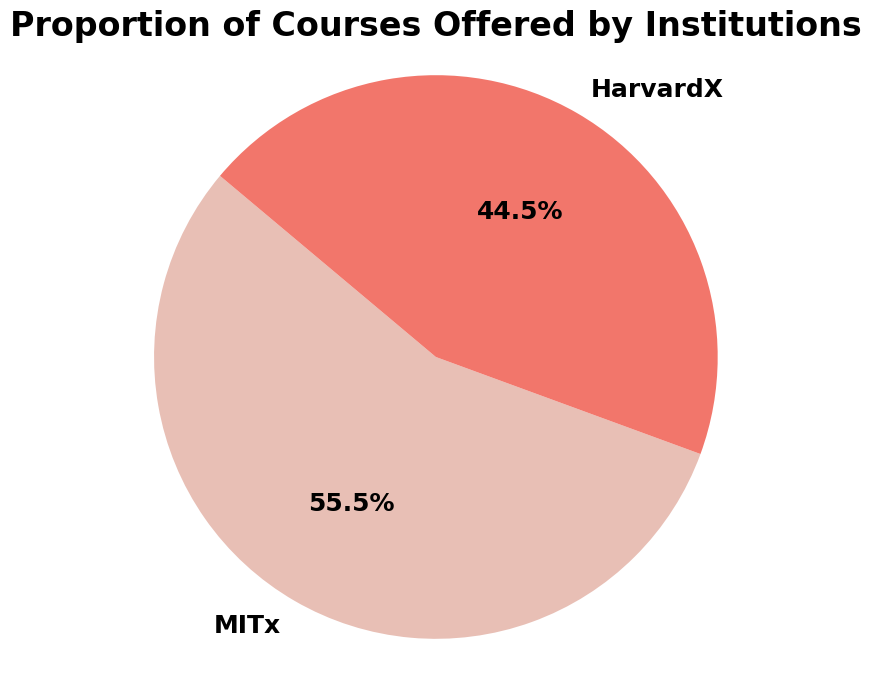

In [3]:
#Proportion of Courses Offered by Institutions

import matplotlib.pyplot as plt
import pandas as pd

# Načtení dat z tabulky "kurzy_cleaned.csv"
data = pd.read_csv("kurzy_cleaned.csv")

# Data pro pie chart
institutions = ["MITx", "HarvardX"]
courses_offered = [
    data[data["Institution"] == institution].shape[0] 
    for institution in institutions
]
colors = ['#e8bfb5', '#F2766B']  # Barvy

# Vytvoření pie chartu
plt.figure(figsize=(8, 8))
plt.pie(
    courses_offered,
    labels=institutions,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 18, 'fontweight': 'bold', 'color': 'black'}
)

# Nastavení nadpisu
plt.title("Proportion of Courses Offered by Institutions", fontsize=24, fontweight='bold', pad=10)

# Zajištění kruhového tvaru
plt.axis('equal')

# Uložení grafu
plt.savefig("Proportion_of_Courses_Offered_by_Institutions.png", bbox_inches='tight')

# Zobrazení grafu
plt.show()
